In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)

In [3]:
app_types_count = application_df.APPLICATION_TYPE.value_counts()

# Determine which values to replace if counts are less than 500
replace_application = list(app_types_count[app_types_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [4]:
class_count = application_df.CLASSIFICATION.value_counts()

# Determine which values to replace if counts are less than 1000
replace_class = list(class_count[class_count < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [5]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [6]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\conno\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Checking potentially noisy variables

In [8]:
application_df.dtypes

STATUS                            int64
ASK_AMT                           int64
IS_SUCCESSFUL                     int64
APPLICATION_TYPE_Other          float64
APPLICATION_TYPE_T10            float64
APPLICATION_TYPE_T19            float64
APPLICATION_TYPE_T3             float64
APPLICATION_TYPE_T4             float64
APPLICATION_TYPE_T5             float64
APPLICATION_TYPE_T6             float64
APPLICATION_TYPE_T7             float64
APPLICATION_TYPE_T8             float64
AFFILIATION_CompanySponsored    float64
AFFILIATION_Family/Parent       float64
AFFILIATION_Independent         float64
AFFILIATION_National            float64
AFFILIATION_Other               float64
AFFILIATION_Regional            float64
CLASSIFICATION_C1000            float64
CLASSIFICATION_C1200            float64
CLASSIFICATION_C2000            float64
CLASSIFICATION_C2100            float64
CLASSIFICATION_C3000            float64
CLASSIFICATION_Other            float64
USE_CASE_CommunityServ          float64


<AxesSubplot:>

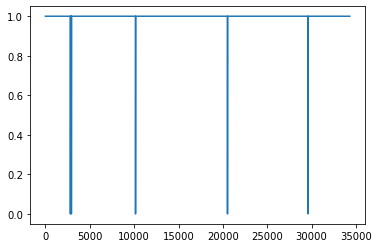

In [9]:
application_df.STATUS.plot()

<AxesSubplot:>

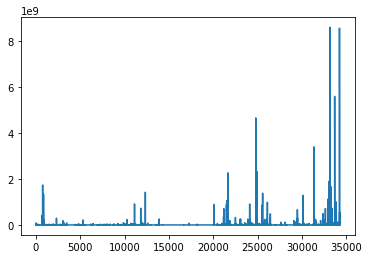

In [10]:
application_df.ASK_AMT.plot()

In [11]:
# Saving two df's: one without STATUS, the other without ASK_AMT
application_df1 = application_df.drop('STATUS', axis=1)
application_df2 = application_df.drop('ASK_AMT', axis=1)

In [13]:
# Split our preprocessed data into our features and target arrays
y1 = application_df1['IS_SUCCESSFUL'].values
X1 = application_df1.drop(['IS_SUCCESSFUL'], axis=1).values

y2 = application_df2['IS_SUCCESSFUL'].values
X2 = application_df2.drop(['IS_SUCCESSFUL'], axis=1).values

# Split the preprocessed data into a training and testing dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=78)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=78)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X1_scaler = scaler.fit(X1_train)
X2_scaler = scaler.fit(X2_train)

# Scale the data
X1_train_scaled = X1_scaler.transform(X1_train)
X1_test_scaled = X1_scaler.transform(X1_test)

X2_train_scaled = X2_scaler.transform(X2_train)
X2_test_scaled = X2_scaler.transform(X2_test)

## Optimize Model

In [15]:
# Trying keras_tuner to run through a bunch of different models

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10,
        max_value=100,
        step=5), activation=activation, input_dim=42))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=5,
            max_value=50,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [16]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [17]:
# Run the kerastuner search for best hyperparameters
tuner.search(X2_train_scaled,y2_train,epochs=20,validation_data=(X2_test_scaled,y2_test))

Trial 60 Complete [00h 00m 19s]
val_accuracy: 0.7259474992752075

Best val_accuracy So Far: 0.7293294668197632
Total elapsed time: 00h 07m 07s
INFO:tensorflow:Oracle triggered exit


In [18]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 65,
 'num_layers': 2,
 'units_0': 25,
 'units_1': 45,
 'units_2': 45,
 'units_3': 10,
 'units_4': 30,
 'units_5': 15,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0043'}

In [20]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X2_test_scaled,y2_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5515 - accuracy: 0.7293 - 292ms/epoch - 1ms/step
Loss: 0.5514740347862244, Accuracy: 0.7293294668197632


In [22]:
# Since the model ran at 20 epochs, I'm gonna adjust it a little and run it for more and see how the accuracy improves
number_input_features = len(X2_train[0])
hidden_nodes_layer1 = 65
hidden_nodes_layer2 = 45
hidden_nodes_layer3 = 45
hidden_nodes_layer4 = 30
hidden_nodes_layer5 = 15
hidden_nodes_layer6 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='tanh')
)

# the rest of the hidden layers
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='tanh'))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='tanh'))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 65)                2795      
                                                                 
 dense_5 (Dense)             (None, 45)                2970      
                                                                 
 dense_6 (Dense)             (None, 45)                2070      
                                                                 
 dense_7 (Dense)             (None, 30)                1380      
                                                                 
 dense_8 (Dense)             (None, 15)                465       
                                                                 
 dense_9 (Dense)             (None, 10)                160       
                                                                 
 dense_10 (Dense)            (None, 1)                

In [23]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights_optimizer2.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

In [25]:
# Train the model
fit_model = nn.fit(X2_train, y2_train, epochs=400, callbacks=[cp_callback])

Epoch 1/400
775/804 [===========================>..] - ETA: 0s - loss: 0.5742 - accuracy: 0.7201
Epoch 1: saving model to checkpoints\weights_optimizer2.01.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5729 - accuracy: 0.7213
Epoch 2/400
771/804 [===========================>..] - ETA: 0s - loss: 0.5600 - accuracy: 0.7292
Epoch 2: saving model to checkpoints\weights_optimizer2.02.hdf5
804/804 [==============================] - 1s 930us/step - loss: 0.5599 - accuracy: 0.7290
Epoch 3/400
772/804 [===========================>..] - ETA: 0s - loss: 0.5568 - accuracy: 0.7306
Epoch 3: saving model to checkpoints\weights_optimizer2.03.hdf5
804/804 [==============================] - 1s 927us/step - loss: 0.5565 - accuracy: 0.7307
Epoch 4/400
773/804 [===========================>..] - ETA: 0s - loss: 0.5551 - accuracy: 0.7310
Epoch 4: saving model to checkpoints\weights_optimizer2.04.hdf5
804/804 [==============================] - 1s 928us/step - loss: 0.5555 - accuracy:

774/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7360
Epoch 33: saving model to checkpoints\weights_optimizer2.33.hdf5
804/804 [==============================] - 1s 926us/step - loss: 0.5422 - accuracy: 0.7365
Epoch 34/400
772/804 [===========================>..] - ETA: 0s - loss: 0.5421 - accuracy: 0.7367
Epoch 34: saving model to checkpoints\weights_optimizer2.34.hdf5
804/804 [==============================] - 1s 927us/step - loss: 0.5417 - accuracy: 0.7369
Epoch 35/400
775/804 [===========================>..] - ETA: 0s - loss: 0.5401 - accuracy: 0.7376
Epoch 35: saving model to checkpoints\weights_optimizer2.35.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5410 - accuracy: 0.7372
Epoch 36/400
770/804 [===========================>..] - ETA: 0s - loss: 0.5399 - accuracy: 0.7384
Epoch 36: saving model to checkpoints\weights_optimizer2.36.hdf5
804/804 [==============================] - 1s 929us/step - loss: 0.5409 - accuracy: 0.73

775/804 [===========================>..] - ETA: 0s - loss: 0.5362 - accuracy: 0.7390
Epoch 65: saving model to checkpoints\weights_optimizer2.65.hdf5
804/804 [==============================] - 1s 926us/step - loss: 0.5368 - accuracy: 0.7388
Epoch 66/400
779/804 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7397
Epoch 66: saving model to checkpoints\weights_optimizer2.66.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5383 - accuracy: 0.7397
Epoch 67/400
776/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7399
Epoch 67: saving model to checkpoints\weights_optimizer2.67.hdf5
804/804 [==============================] - 1s 927us/step - loss: 0.5377 - accuracy: 0.7399
Epoch 68/400
771/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7403
Epoch 68: saving model to checkpoints\weights_optimizer2.68.hdf5
804/804 [==============================] - 1s 929us/step - loss: 0.5370 - accuracy: 0.73

768/804 [===========================>..] - ETA: 0s - loss: 0.5363 - accuracy: 0.7396
Epoch 97: saving model to checkpoints\weights_optimizer2.97.hdf5
804/804 [==============================] - 1s 930us/step - loss: 0.5361 - accuracy: 0.7399
Epoch 98/400
770/804 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7402
Epoch 98: saving model to checkpoints\weights_optimizer2.98.hdf5
804/804 [==============================] - 1s 931us/step - loss: 0.5353 - accuracy: 0.7406
Epoch 99/400
771/804 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7410
Epoch 99: saving model to checkpoints\weights_optimizer2.99.hdf5
804/804 [==============================] - 1s 931us/step - loss: 0.5351 - accuracy: 0.7413
Epoch 100/400
774/804 [===========================>..] - ETA: 0s - loss: 0.5356 - accuracy: 0.7404
Epoch 100: saving model to checkpoints\weights_optimizer2.100.hdf5
804/804 [==============================] - 1s 926us/step - loss: 0.5354 - accuracy: 0

Epoch 129/400
769/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7415
Epoch 129: saving model to checkpoints\weights_optimizer2.129.hdf5
804/804 [==============================] - 1s 932us/step - loss: 0.5338 - accuracy: 0.7415
Epoch 130/400
769/804 [===========================>..] - ETA: 0s - loss: 0.5350 - accuracy: 0.7411
Epoch 130: saving model to checkpoints\weights_optimizer2.130.hdf5
804/804 [==============================] - 1s 934us/step - loss: 0.5338 - accuracy: 0.7417
Epoch 131/400
763/804 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7416
Epoch 131: saving model to checkpoints\weights_optimizer2.131.hdf5
804/804 [==============================] - 1s 940us/step - loss: 0.5341 - accuracy: 0.7406
Epoch 132/400
760/804 [===========================>..] - ETA: 0s - loss: 0.5340 - accuracy: 0.7409
Epoch 132: saving model to checkpoints\weights_optimizer2.132.hdf5
804/804 [==============================] - 1s 942us/step - loss

Epoch 161/400
761/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7415
Epoch 161: saving model to checkpoints\weights_optimizer2.161.hdf5
804/804 [==============================] - 1s 940us/step - loss: 0.5343 - accuracy: 0.7411
Epoch 162/400
766/804 [===========================>..] - ETA: 0s - loss: 0.5337 - accuracy: 0.7409
Epoch 162: saving model to checkpoints\weights_optimizer2.162.hdf5
804/804 [==============================] - 1s 933us/step - loss: 0.5337 - accuracy: 0.7413
Epoch 163/400
772/804 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7421
Epoch 163: saving model to checkpoints\weights_optimizer2.163.hdf5
804/804 [==============================] - 1s 929us/step - loss: 0.5331 - accuracy: 0.7420
Epoch 164/400
766/804 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7413
Epoch 164: saving model to checkpoints\weights_optimizer2.164.hdf5
804/804 [==============================] - 1s 934us/step - loss

Epoch 193/400
775/804 [===========================>..] - ETA: 0s - loss: 0.5320 - accuracy: 0.7426
Epoch 193: saving model to checkpoints\weights_optimizer2.193.hdf5
804/804 [==============================] - 1s 925us/step - loss: 0.5327 - accuracy: 0.7420
Epoch 194/400
770/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7419
Epoch 194: saving model to checkpoints\weights_optimizer2.194.hdf5
804/804 [==============================] - 1s 930us/step - loss: 0.5332 - accuracy: 0.7420
Epoch 195/400
773/804 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7414
Epoch 195: saving model to checkpoints\weights_optimizer2.195.hdf5
804/804 [==============================] - 1s 926us/step - loss: 0.5333 - accuracy: 0.7417
Epoch 196/400
771/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7406
Epoch 196: saving model to checkpoints\weights_optimizer2.196.hdf5
804/804 [==============================] - 1s 929us/step - loss

Epoch 225/400
773/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7428
Epoch 225: saving model to checkpoints\weights_optimizer2.225.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5324 - accuracy: 0.7423
Epoch 226/400
777/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7418
Epoch 226: saving model to checkpoints\weights_optimizer2.226.hdf5
804/804 [==============================] - 1s 924us/step - loss: 0.5321 - accuracy: 0.7418
Epoch 227/400
774/804 [===========================>..] - ETA: 0s - loss: 0.5331 - accuracy: 0.7413
Epoch 227: saving model to checkpoints\weights_optimizer2.227.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5327 - accuracy: 0.7417
Epoch 228/400
776/804 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7413
Epoch 228: saving model to checkpoints\weights_optimizer2.228.hdf5
804/804 [==============================] - 1s 923us/step - loss

Epoch 257/400
768/804 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7410
Epoch 257: saving model to checkpoints\weights_optimizer2.257.hdf5
804/804 [==============================] - 1s 931us/step - loss: 0.5327 - accuracy: 0.7413
Epoch 258/400
768/804 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7413
Epoch 258: saving model to checkpoints\weights_optimizer2.258.hdf5
804/804 [==============================] - 1s 931us/step - loss: 0.5324 - accuracy: 0.7419
Epoch 259/400
774/804 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7413
Epoch 259: saving model to checkpoints\weights_optimizer2.259.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5323 - accuracy: 0.7419
Epoch 260/400
777/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7424
Epoch 260: saving model to checkpoints\weights_optimizer2.260.hdf5
804/804 [==============================] - 1s 938us/step - loss

Epoch 289/400
772/804 [===========================>..] - ETA: 0s - loss: 0.5343 - accuracy: 0.7410
Epoch 289: saving model to checkpoints\weights_optimizer2.289.hdf5
804/804 [==============================] - 1s 932us/step - loss: 0.5338 - accuracy: 0.7411
Epoch 290/400
769/804 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7415
Epoch 290: saving model to checkpoints\weights_optimizer2.290.hdf5
804/804 [==============================] - 1s 932us/step - loss: 0.5330 - accuracy: 0.7417
Epoch 291/400
775/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7430
Epoch 291: saving model to checkpoints\weights_optimizer2.291.hdf5
804/804 [==============================] - 1s 926us/step - loss: 0.5324 - accuracy: 0.7419
Epoch 292/400
767/804 [===========================>..] - ETA: 0s - loss: 0.5336 - accuracy: 0.7413
Epoch 292: saving model to checkpoints\weights_optimizer2.292.hdf5
804/804 [==============================] - 1s 931us/step - loss

Epoch 321/400
762/804 [===========================>..] - ETA: 0s - loss: 0.5330 - accuracy: 0.7414
Epoch 321: saving model to checkpoints\weights_optimizer2.321.hdf5
804/804 [==============================] - 1s 939us/step - loss: 0.5331 - accuracy: 0.7409
Epoch 322/400
768/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7419
Epoch 322: saving model to checkpoints\weights_optimizer2.322.hdf5
804/804 [==============================] - 1s 933us/step - loss: 0.5337 - accuracy: 0.7417
Epoch 323/400
768/804 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.7418
Epoch 323: saving model to checkpoints\weights_optimizer2.323.hdf5
804/804 [==============================] - 1s 934us/step - loss: 0.5326 - accuracy: 0.7416
Epoch 324/400
780/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7417
Epoch 324: saving model to checkpoints\weights_optimizer2.324.hdf5
804/804 [==============================] - 1s 928us/step - loss

Epoch 353/400
777/804 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7419
Epoch 353: saving model to checkpoints\weights_optimizer2.353.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5333 - accuracy: 0.7416
Epoch 354/400
775/804 [===========================>..] - ETA: 0s - loss: 0.5329 - accuracy: 0.7411
Epoch 354: saving model to checkpoints\weights_optimizer2.354.hdf5
804/804 [==============================] - 1s 927us/step - loss: 0.5322 - accuracy: 0.7419
Epoch 355/400
774/804 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7416
Epoch 355: saving model to checkpoints\weights_optimizer2.355.hdf5
804/804 [==============================] - 1s 925us/step - loss: 0.5323 - accuracy: 0.7418
Epoch 356/400
777/804 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.7412
Epoch 356: saving model to checkpoints\weights_optimizer2.356.hdf5
804/804 [==============================] - 1s 923us/step - loss

Epoch 385/400
777/804 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7413
Epoch 385: saving model to checkpoints\weights_optimizer2.385.hdf5
804/804 [==============================] - 1s 923us/step - loss: 0.5324 - accuracy: 0.7416
Epoch 386/400
772/804 [===========================>..] - ETA: 0s - loss: 0.5326 - accuracy: 0.7419
Epoch 386: saving model to checkpoints\weights_optimizer2.386.hdf5
804/804 [==============================] - 1s 928us/step - loss: 0.5336 - accuracy: 0.7410
Epoch 387/400
769/804 [===========================>..] - ETA: 0s - loss: 0.5324 - accuracy: 0.7415
Epoch 387: saving model to checkpoints\weights_optimizer2.387.hdf5
804/804 [==============================] - 1s 930us/step - loss: 0.5318 - accuracy: 0.7417
Epoch 388/400
771/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7425
Epoch 388: saving model to checkpoints\weights_optimizer2.388.hdf5
804/804 [==============================] - 1s 930us/step - loss

In [26]:
# Save the model
nn.save('optimized_application2.h5')

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X2_test_scaled,y2_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7096 - accuracy: 0.6729 - 251ms/epoch - 936us/step
Loss: 0.7095924019813538, Accuracy: 0.672886312007904


## Trying a completely different model

In [28]:
# Random forest classifiers
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

# Remaking X and y
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brfc.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [29]:
# Calculated the balanced accuracy score
from sklearn.metrics import accuracy_score

predictions = brfc.predict(X_test)
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.7093877551020408


In [30]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[2758, 1245],
       [1247, 3325]], dtype=int64)

In [31]:
# Print the imbalanced classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      4003
           1       0.73      0.73      0.73      4572

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575



In [32]:
imp = application_df.drop(['IS_SUCCESSFUL'], axis=1)

# List the features sorted in descending order by feature importance
importances = brfc.feature_importances_
sorted(zip(importances, imp.columns), reverse=True)

[(0.4079536990409288, 'ASK_AMT'),
 (0.13516864503524254, 'AFFILIATION_Independent'),
 (0.12002388980365492, 'AFFILIATION_CompanySponsored'),
 (0.028222997217066212, 'APPLICATION_TYPE_T5'),
 (0.027471679869267008, 'ORGANIZATION_Association'),
 (0.024592737342301427, 'APPLICATION_TYPE_T10'),
 (0.02017256632668247, 'ORGANIZATION_Trust'),
 (0.018820811520841522, 'CLASSIFICATION_Other'),
 (0.01792302518108682, 'CLASSIFICATION_C2100'),
 (0.017211147496248882, 'CLASSIFICATION_C2000'),
 (0.01683929196751793, 'APPLICATION_TYPE_T3'),
 (0.016309041316867993, 'APPLICATION_TYPE_T19'),
 (0.015160028988009038, 'APPLICATION_TYPE_T4'),
 (0.01315705521094131, 'CLASSIFICATION_C1000'),
 (0.011930771631134852, 'USE_CASE_ProductDev'),
 (0.011889935174658356, 'APPLICATION_TYPE_T6'),
 (0.01007186153973134, 'CLASSIFICATION_C1200'),
 (0.009774805656273032, 'USE_CASE_Preservation'),
 (0.008573359791494133, 'INCOME_AMT_0'),
 (0.007848585323428414, 'CLASSIFICATION_C3000'),
 (0.0076642820356847005, 'INCOME_AMT_2500

In [33]:
# Testing Easy Ensemble Classifier
from imblearn.ensemble import EasyEnsembleClassifier

eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [34]:
# Calculated the balanced accuracy score
predictions = eec.predict(X_test)
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.710204081632653


In [35]:
# Display the confusion matrix
confusion_matrix(y_test, predictions)

array([[2722, 1281],
       [1204, 3368]], dtype=int64)

In [36]:
# Print the imbalanced classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69      4003
           1       0.72      0.74      0.73      4572

    accuracy                           0.71      8575
   macro avg       0.71      0.71      0.71      8575
weighted avg       0.71      0.71      0.71      8575

